In [1]:
#importing the data
import pandas as pd
data = pd.read_csv('Amazon_reviews.csv')
data.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [2]:
#handling duplicates
print("No.of rows before removing duplicates: ", len(data))
duplicates_count = data.duplicated().sum()
print("No. of duplicate rows: ",duplicates_count)
data.drop_duplicates(inplace=True)
print("No.of rows after removing duplicates: ", len(data))
data.head()

No.of rows before removing duplicates:  413840
No. of duplicate rows:  64079
No.of rows after removing duplicates:  349761


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [3]:
#handling missing data
data.dropna(inplace=True)
print("No.of rows after removing missing values: ", len(data))

No.of rows after removing missing values:  281249


In [4]:
# Remove any 'neutral' ratings equal to 3
data = data[data['Rating'] != 3]
print("Count of data points after removing neutral comments:", len(data)) 

Count of data points after removing neutral comments: 258625


In [5]:
# adding a new column, where if rating>3 is 0, rating<3 is 1
data['Sentiment'] = data['Rating'].apply(lambda x: 1 if x > 3 else 0)
data.head(10)


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,1
11,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,This is a great product it came after two days...,0.0,1


In [6]:
# Summary statistics of numerical columns
print("\nSummary Statistics:\n", data.describe())


Summary Statistics:
                Price         Rating   Review Votes      Sentiment
count  258625.000000  258625.000000  258625.000000  258625.000000
mean      228.319646       3.854519       1.574337       0.738451
std       290.295248       1.602251       9.759297       0.439479
min         1.730000       1.000000       0.000000       0.000000
25%        78.000000       2.000000       0.000000       0.000000
50%       139.950000       5.000000       0.000000       1.000000
75%       269.100000       5.000000       1.000000       1.000000
max      2598.000000       5.000000     645.000000       1.000000


In [7]:
import warnings
warnings.filterwarnings('ignore')

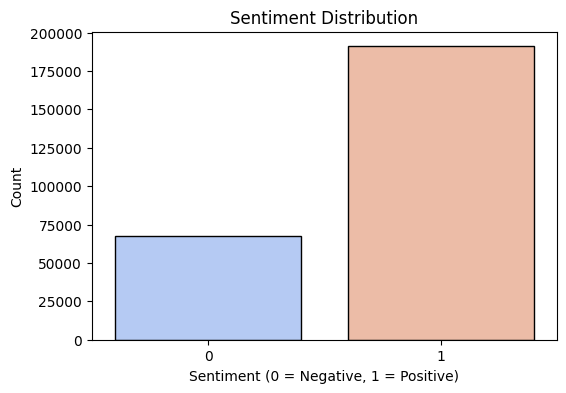

In [8]:
# Distribution of Sentiments
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(6,4))
sns.countplot(x=data['Sentiment'], palette="coolwarm", edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Count')
plt.show()

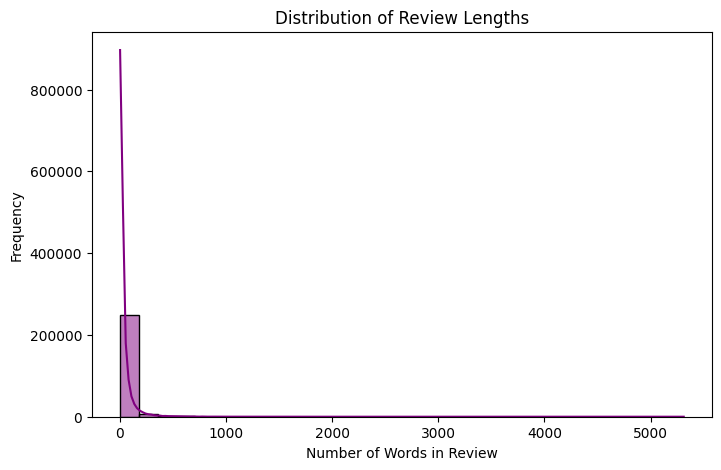

In [9]:
# Review Length Distribution
import seaborn as sns
from matplotlib import pyplot as plt
data['Review_Length'] = data['Reviews'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8,5))
sns.histplot(data['Review_Length'], bins=30, kde=True, color='purple')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words in Review')
plt.ylabel('Frequency')
plt.show()


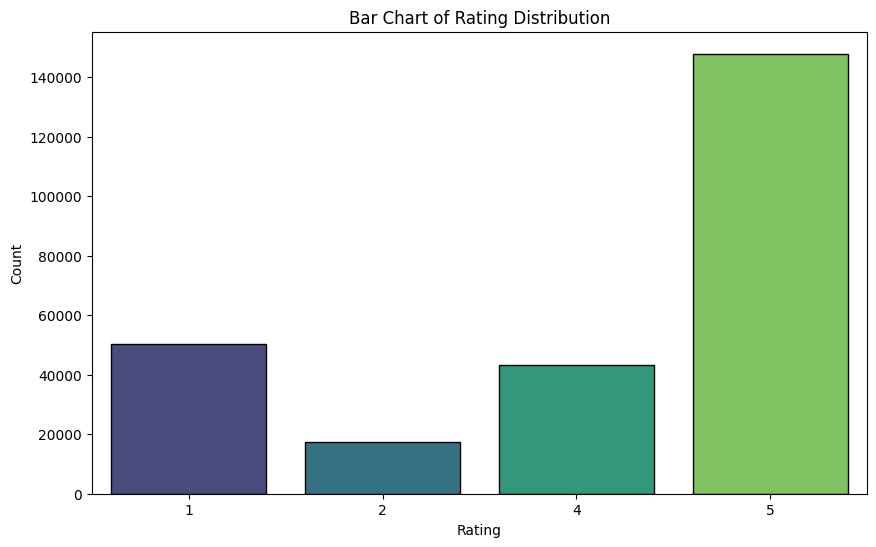

In [10]:
# Bar Chart of Rating Distribution
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
sns.countplot(x=data['Rating'], palette="viridis", edgecolor='black')
plt.title('Bar Chart of Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

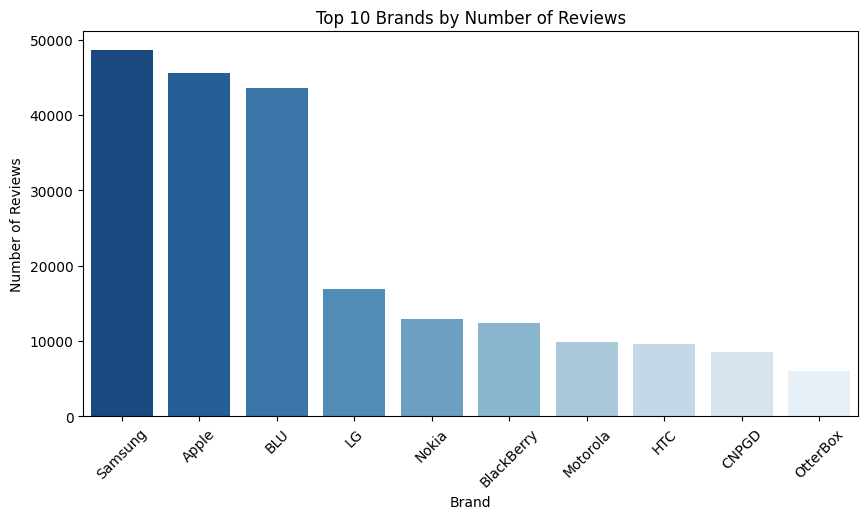

In [11]:
# Top Brands by Review Count
import seaborn as sns
from matplotlib import pyplot as plt


plt.figure(figsize=(10,5))
top_brands = data['Brand Name'].value_counts().head(10)
sns.barplot(x=top_brands.index, y=top_brands.values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title('Top 10 Brands by Number of Reviews')
plt.xlabel('Brand')
plt.ylabel('Number of Reviews')
plt.show()


In [12]:
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import PorterStemmer
import re


def remove_html_tags(text):
    return BeautifulSoup(text, 'lxml').get_text()


def remove_non_alphabetic(text):
    return re.sub(r"[^a-zA-Z]", " ", text)

def tokenize_text(text):
    return text.lower().split() #convert to lowercase and split

def remove_stopwords(words):
    return [word for word in words if word not in ENGLISH_STOP_WORDS]

def stem_words(words):
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def clean_text(raw_text, remove_stopwords_flag=True, stemming=False, split_text=False):
    text = remove_html_tags(raw_text)
    text = remove_non_alphabetic(text)
    words = tokenize_text(text)

    if remove_stopwords_flag:
        words = remove_stopwords(words)

    if stemming:
        words = stem_words(words)

    return words if split_text else " ".join(words)


In [13]:
data['Cleaned_Reviews'] = data['Reviews'].apply(lambda x: clean_text(x, remove_stopwords_flag=True, stemming=True, split_text=False))
data.head(5)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment,Review_Length,Cleaned_Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1,72,feel lucki use phone use hard phone line upgra...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1,40,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1,2,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1,17,work good goe slow good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1,43,great phone replac lost phone thing volum butt...


In [14]:
from sklearn.model_selection import train_test_split

# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(data['Cleaned_Reviews'], data['Sentiment'], \
                                                    test_size=0.2, random_state=0)

print('training set - %d\n' %(X_train.shape[0]))
print('validation set - %d' %X_test.shape[0])

training set - 206900

validation set - 51725


In [15]:
import nltk
#nltk.download('punkt')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\snigd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [16]:
#parse reviews
def extract_sentences(review_text, tokenizer, exclude_stopwords=False):
    sentence_list = tokenizer.tokenize(review_text.strip())
    processed_sentences = [clean_text(sentence, exclude_stopwords, split_text=True) 
                           for sentence in sentence_list if sentence]
    return processed_sentences

# Process each review in the training data into individual sentences
sentence_collection = []
for review in X_train:
    sentence_collection.extend(extract_sentences(review, tokenizer))

print(f'Number of parsed sentences in the training dataset: {len(sentence_collection)}')


Number of parsed sentences in the training dataset: 206200


In [17]:
#pip install gensim
#pip install keras
#pip install tensorflow

In [18]:

from gensim.models import Word2Vec

# Define Word2Vec hyperparameters
embedding_dim = 300                    
min_word_freq = 10                    
num_threads = 4        
window_size = 10                                                                                          
subsampling = 1e-3 

# Store parameters as a dictionary
w2v_params = {
    'workers': num_threads,
    'vector_size': embedding_dim,  
    'min_count': min_word_freq,
    'window': window_size,
    'sample': subsampling
}

# Train Word2Vec model
print("Initializing Word2Vec training...\n")
word2vec_model = Word2Vec(sentence_collection, **w2v_params)
word2vec_model.init_sims(replace=True)

# Save the trained model
word2vec_model.save("word2vec_trained_model")

# Retrieve vocabulary size
vocab_size = len(word2vec_model.wv.index_to_key)
print(f"Total words in vocabulary: {vocab_size} \n")


Initializing Word2Vec training...

Total words in vocabulary: 7666 



In [19]:
# Load trained Word2Vec model
w2v = Word2Vec.load("word2vec_trained_model")

# Get Word2Vec embedding matrix
embedding_matrix = w2v.wv.vectors 
print("Shape of embedding matrix:", embedding_matrix.shape)  # (vocabulary size, embedding dimension)


Shape of embedding matrix: (7666, 300)


In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.layers import Embedding

In [21]:


config = {
    'max_words': embedding_matrix.shape[0],  
    'sequence_length': 100,
    'batch_size': 32,
    'num_classes': 2, 
    'epochs': 3
}

# Tokenize the training and test datasets into 2D arrays
tokenizer = Tokenizer(num_words=config['max_words']) 
tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to the specified length
X_train_padded = sequence.pad_sequences(train_sequences, maxlen=config['sequence_length'])
X_test_padded = sequence.pad_sequences(test_sequences, maxlen=config['sequence_length'])


# Apply one-hot encoding to labels
y_train_encoded = to_categorical(y_train, config['num_classes'])
y_test_encoded = to_categorical(y_test, config['num_classes'])

# Display the shape of the datasets
print(f'X_train shape: {X_train_padded.shape}')  
print(f'X_test shape: {X_test_padded.shape}')  
print(f'y_train shape: {y_train_encoded.shape}')  
print(f'y_test shape: {y_test_encoded.shape}')  


X_train shape: (206900, 100)
X_test shape: (51725, 100)
y_train shape: (206900, 2)
y_test shape: (51725, 2)


In [22]:

embedding_layer = Embedding(
    input_dim=embedding_matrix.shape[0],  # Number of unique words
    output_dim=embedding_matrix.shape[1],  # Dimension of embedding vectors
    trainable=False,  # Set to False to freeze the embedding layer
)

# Initialize the embedding layer with the provided embedding matrix
embedding_layer.build((None,))
embedding_layer.set_weights([embedding_matrix])


In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout, Activation, Lambda

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 300)                 │       2,299,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,299,800 (8.77 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,299,800 (8.77 MB)

Epoch 1/3
6466/6466 ━━━━━━━━━━━━━━━━━━━━ 964s 148ms/step - accuracy: 0.8240 - loss: 0.3869 - val_accuracy: 0.9012 - val_loss: 0.2434
Epoch 2/3
6466/6466 ━━━━━━━━━━━━━━━━━━━━ 982s 152ms/step - accuracy: 0.8974 - loss: 0.2500 - val_accuracy: 0.9185 - val_loss: 0.2068
Epoch 3/3
6466/6466 ━━━━━━━━━━━━━━━━━━━━ 994s 154ms/step - accuracy: 0.9150 - loss: 0.2128 - val_accuracy: 0.9269 - val_loss: 0.1879
1617/1617 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.9278 - loss: 0.1851
Test loss: 0.1879
Test accuracy: 0.9269


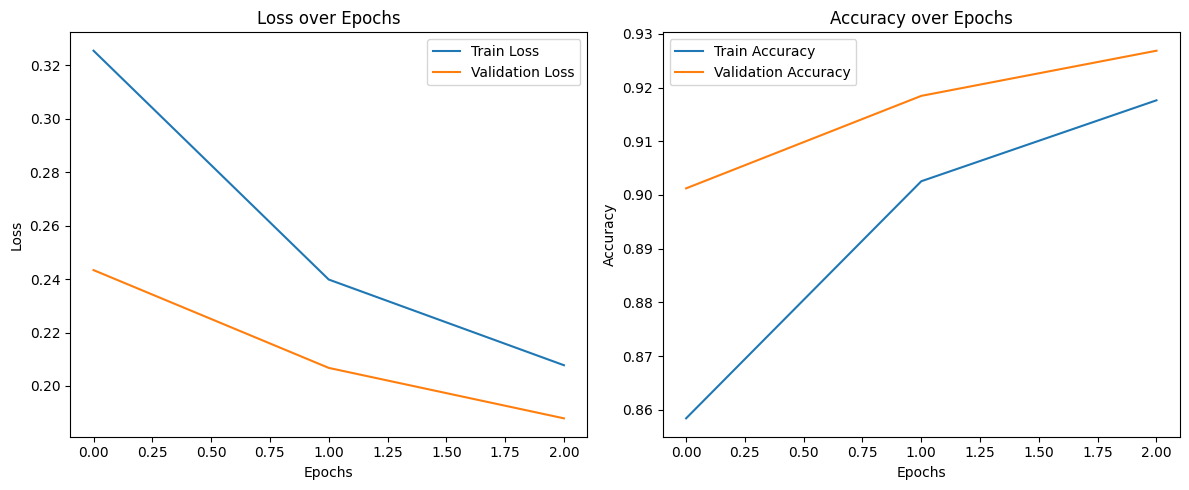

In [24]:
import matplotlib.pyplot as plt

# Build the model
model_lstm = Sequential()
model_lstm.add(embedding_layer)  # Add the embedding layer
model_lstm.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # Add LSTM layer
model_lstm.add(Dense(config['num_classes']))  # Output layer
model_lstm.add(Activation('softmax'))  # Softmax activation for multi-class classification
model_lstm.summary()  # Print model summary

# Compile the LSTM model
model_lstm.compile(loss='binary_crossentropy',  # Binary crossentropy loss function
                   optimizer='adam',  # Adam optimizer
                   metrics=['accuracy'])  # Track accuracy metric

# Train the model and save the training history
history = model_lstm.fit(
    X_train_padded, 
    y_train_encoded, 
    batch_size=config['batch_size'], 
    epochs=config['epochs'], 
    verbose=1,
    validation_data=(X_test_padded, y_test_encoded)  
)

# Evaluate the model
eval_score = model_lstm.evaluate(X_test_padded, y_test_encoded, batch_size=config['batch_size'])
print(f'Test loss: {eval_score[0]:.4f}')
print(f'Test accuracy: {eval_score[1]:.4f}')


fig, axs = plt.subplots(1, 2, figsize=(12, 5))  

# Plot Loss
axs[0].plot(history.history['loss'], label='Train Loss')
axs[0].plot(history.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot Accuracy
axs[1].plot(history.history['accuracy'], label='Train Accuracy')
axs[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()



In [35]:
from transformers import BertTokenizer, TFBertForSequenceClassification
import tensorflow as tf
df = pd.read_csv('Amazon_reviews.csv')
df = df.sample(frac=0.01, random_state=0)
df.drop_duplicates(inplace=True) # drop duplicates
df.dropna(inplace=True) # drop missing values
df = df[df['Rating'] != 3] # remove neutral ratings
df['Sentiment'] = df['Rating'].apply(lambda x: 1 if x > 3 else 0) #if rating>3 is 0, rating<3 is 1

In [36]:
from sklearn.model_selection import train_test_split

# Split data into training set and validation
X_train, X_test, y_train, y_test = train_test_split(df['Reviews'], df['Sentiment'], \
                                                    test_size=0.2, random_state=0)

X_train_cleaned = [clean_text(d) for d in X_train]
X_test_cleaned = [clean_text(d) for d in X_test]

In [37]:
pip install tf-keras


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: C:\Users\snigd\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [38]:
import matplotlib.pyplot as plt
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Tokenize the data
X_train_bert = tokenizer(X_train.tolist(), padding=True, truncation=True, max_length=100, return_tensors="tf")
X_test_bert = tokenizer(X_test.tolist(), padding=True, truncation=True, max_length=100, return_tensors="tf")

# Set training parameters
batch_size = 32
epochs = 3
steps_per_epoch = len(X_train) // batch_size
num_train_steps = steps_per_epoch * epochs

# Create optimizer and learning rate scheduler
optimizer, lr_schedule = create_optimizer(
    init_lr=2e-5,
    num_train_steps=num_train_steps,
    num_warmup_steps=0
)

# Compile the model
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Train the model and save the training history
history_bert = bert_model.fit(
    x={
        'input_ids': X_train_bert['input_ids'],
        'attention_mask': X_train_bert['attention_mask'],
        'token_type_ids': X_train_bert['token_type_ids']
    },
    y=y_train,
    validation_data=(
        {
            'input_ids': X_test_bert['input_ids'],
            'attention_mask': X_test_bert['attention_mask'],
            'token_type_ids': X_test_bert['token_type_ids']
        },
        y_test
    ),
    epochs=epochs,
    batch_size=batch_size
)

# Evaluate the model
loss, accuracy = bert_model.evaluate(
    x={
        'input_ids': X_test_bert['input_ids'],
        'attention_mask': X_test_bert['attention_mask'],
        'token_type_ids': X_test_bert['token_type_ids']
    },
    y=y_test
)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
77/77 [==============================] - 1106s 14s/step - loss: 0.3713 - accuracy: 0.8173 - val_loss: 0.2597 - val_accuracy: 0.8880
Epoch 2/3
77/77 [==============================] - 1338s 17s/step - loss: 0.1256 - accuracy: 0.9598 - val_loss: 0.1698 - val_accuracy: 0.9416
Epoch 3/3
20/20 [==============================] - 98s 5s/step - loss: 0.1847 - accuracy: 0.9432
Test Loss: 0.1847
Test Accuracy: 0.9432


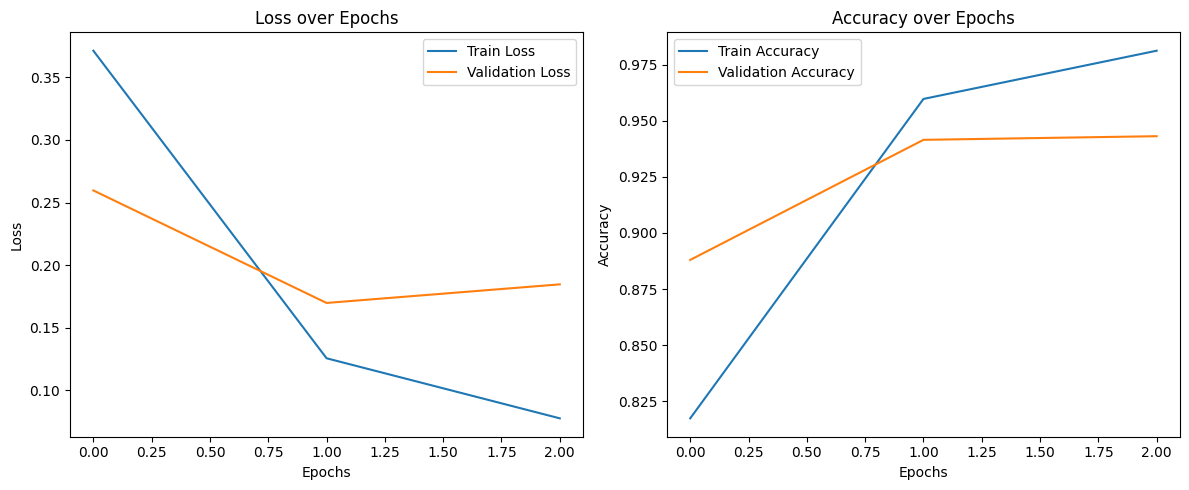

In [39]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5)) 

# Plot Loss
axs[0].plot(history_bert.history['loss'], label='Train Loss')
axs[0].plot(history_bert.history['val_loss'], label='Validation Loss')
axs[0].set_title('Loss over Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

# Plot Accuracy
axs[1].plot(history_bert.history['accuracy'], label='Train Accuracy')
axs[1].plot(history_bert.history['val_accuracy'], label='Validation Accuracy')
axs[1].set_title('Accuracy over Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()

plt.tight_layout()
plt.show()